In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("Data Potensi Pemain Basket Tingkat SMA after preprocessing.csv",delimiter=";")

In [14]:
df

,Height (cm),Weight (kg),Vertical Jump (cm),Potential
0,172,63,45,Medium
1,180,75,48,High
2,165,55,40,Low
3,185,80,50,High
4,170,62,42,Medium
...,...,...,...,...
512,167,61,30,Low
513,162,57,31,Low
514,160,55,27,Low
515,164,58,29,Low


Outlier Indices: {'Height (cm)': [188], 'Weight (kg)': [402], 'Vertical Jump (cm)': [380, 398, 402, 471, 509]}


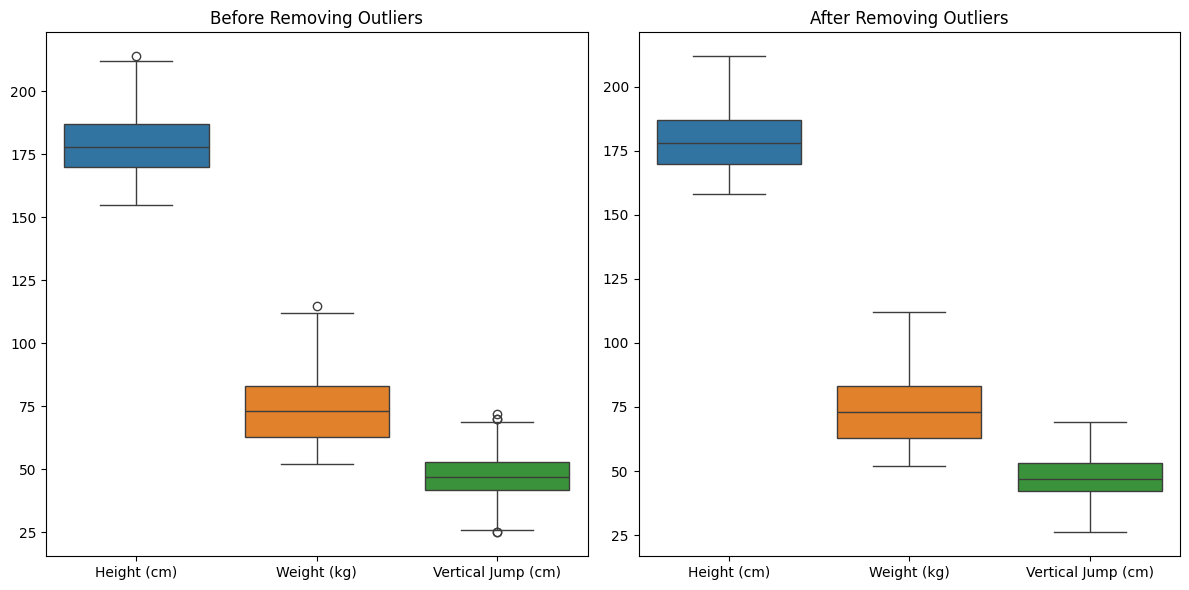

In [15]:
# Function to detect outliers using IQR method
def detect_outliers(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    outliers = {}

    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = outliers_in_col.index.tolist()
    
    return outliers

# Detect outliers
outliers = detect_outliers(df)
print("Outlier Indices:", outliers)

# Drop the outliers from the DataFrame
outlier_indices = [index for indices in outliers.values() for index in indices]
df_cleaned = df.drop(index=outlier_indices)

# Visualize the data with boxplots before and after removing the outliers

# Plot before dropping outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['Height (cm)', 'Weight (kg)', 'Vertical Jump (cm)']])
plt.title("Before Removing Outliers")

# Plot after dropping outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned[['Height (cm)', 'Weight (kg)', 'Vertical Jump (cm)']])
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()

In [16]:
df_cleaned

,Height (cm),Weight (kg),Vertical Jump (cm),Potential
0,172,63,45,Medium
1,180,75,48,High
2,165,55,40,Low
3,185,80,50,High
4,170,62,42,Medium
...,...,...,...,...
512,167,61,30,Low
513,162,57,31,Low
514,160,55,27,Low
515,164,58,29,Low


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split the data into features (X) and target (y)
X = df_cleaned.drop('Potential', axis=1)  # Features (all columns except target)
y = df_cleaned['Potential']  # Target variable

# Apply One-Hot Encoding to 'y' (target variable)
encoder = OneHotEncoder(sparse_output=False)  # Correct keyword for sparse output
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))  # Fit and transform the target labels

# Convert the encoded array into a DataFrame for better readability
y_encoded_df = pd.DataFrame(y_encoded, columns=encoder.categories_[0])

# Split into train and test sets (80% train, 20% test), with randomization
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded_df, test_size=0.2, random_state=42)

# Display the splits
print("Training Features:\n", X_train)
print("\nTest Features:\n", X_test)
print("\nTraining Target:\n", y_train)
print("\nTest Target:\n", y_test)

Training Features:
      Height (cm)  Weight (kg)  Vertical Jump (cm)
209          188           83                  54
205          165           60                  40
302          185           81                  55
392          210          112                  69
420          190           85                  54
..           ...          ...                 ...
106          174           69                  46
271          179           74                  48
349          175           72                  48
439          179           72                  48
102          170           65                  42

[408 rows x 3 columns]

Test Features:
      Height (cm)  Weight (kg)  Vertical Jump (cm)
124          174           68                  45
84           169           61                  41
437          200           95                  59
256          175           72                  45
68           175           70                  44
..           ...          ...          

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_cleaned.drop('Potential', axis=1)  # Features (all columns except target)
y = df_cleaned['Potential']  # Target variable (no encoding applied)

# Split into train and test sets (80% train, 20% test), with randomization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the splits
print("Training Features:\n", X_train)
print("\nTest Features:\n", X_test)
print("\nTraining Target:\n", y_train)
print("\nTest Target:\n", y_test)


Training Features:
      Height (cm)  Weight (kg)  Vertical Jump (cm)
209          188           83                  54
205          165           60                  40
302          185           81                  55
392          210          112                  69
420          190           85                  54
..           ...          ...                 ...
106          174           69                  46
271          179           74                  48
349          175           72                  48
439          179           72                  48
102          170           65                  42

[408 rows x 3 columns]

Test Features:
      Height (cm)  Weight (kg)  Vertical Jump (cm)
124          174           68                  45
84           169           61                  41
437          200           95                  59
256          175           72                  45
68           175           70                  44
..           ...          ...          

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 4: Apply K-Nearest Neighbors (KNN) for classification
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust 'n_neighbors' based on your needs
knn.fit(X_train, y_train)  # Train the model

# Step 5: Make predictions and evaluate the model
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# # Step 6: Inverse Transform the predictions to original labels
# y_pred_labels = encoder.inverse_transform(y_pred)


Accuracy: 93.20%
